In [143]:
import pandas as pd
from sklearn.utils import resample

In [149]:
# Split majority and minority classes
df_majority = df1[df1["Status"] == 1]
df_minority = df1[df1["Status"] == 0]

In [145]:
# Upsample minority
df_minority_upsampled = resample(
    df_minority,
    replace=True,              # sample with replacement
    n_samples=len(df_majority),# match majority count
    random_state=42
)

In [146]:
# Combine back
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [147]:
print("Class counts after upsampling:")
print(df_upsampled["Status"].value_counts())

Class counts after upsampling:
Status
1    36439
0    36439
Name: count, dtype: int64


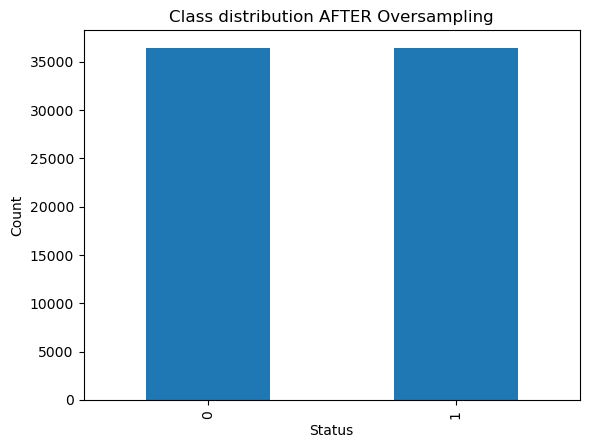

In [159]:
plt.figure()
df_upsampled["Status"].value_counts().sort_index().plot(kind="bar")
plt.title("Class distribution AFTER Oversampling")
plt.xlabel("Status"); plt.ylabel("Count")
plt.show()

- Random Undersampling (reduce majority class)

In [152]:
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [153]:
class_counts = df["Status"].value_counts()
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

df_majority = df[df["Status"] == majority_class]
df_minority = df[df["Status"] == minority_class]

In [154]:
print("Majority class:", majority_class, "size:", len(df_majority))
print("Minority class:", minority_class, "size:", len(df_minority))

Majority class: 0 size: 112031
Minority class: 1 size: 36439


In [155]:
# Downsample majority to match minority
df_majority_downsampled = resample(
    df_majority,
    replace=False,                 
    n_samples=len(df_minority),    
    random_state=42
)


In [156]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])


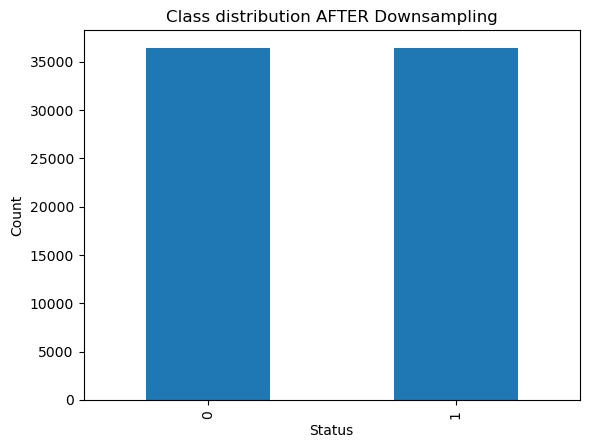

In [157]:
plt.figure()
df_downsampled["Status"].value_counts().sort_index().plot(kind="bar")
plt.title("Class distribution AFTER Downsampling")
plt.xlabel("Status"); plt.ylabel("Count")
plt.show()